Input features:
    Runs, 
    At Bats, 
    Hits, 
    Doubles,
    Triples, 
    Homeruns, 
    Walks, 
    Strikeouts, 
    Stolen Bases, 
    Runs Allowed, 
    Earned Runs, 
    Earned Run Average (ERA), 
    Shutouts, 
    Saves, and Errors
    
Output: Number of predicted wins (W)   

In [95]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [96]:
#loading the dataset
df=pd.read_csv("baseball.csv")

In [97]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [98]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [99]:
#checking for the null values in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Our dataset does not contain any missing values

In [100]:
#column names of the dataset
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [101]:
#statistical summary of the dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [102]:
#importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

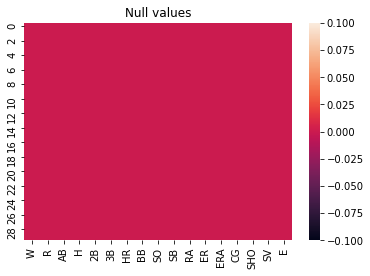

In [103]:
# visualising the null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show

In [104]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

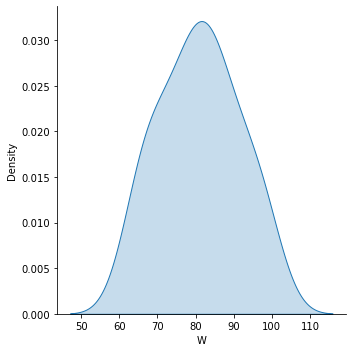

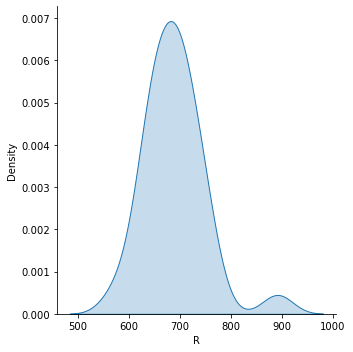

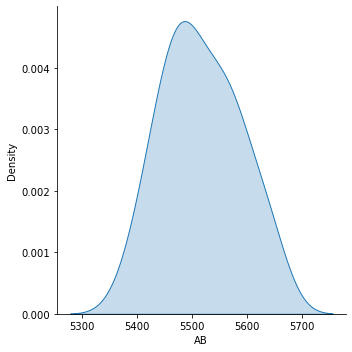

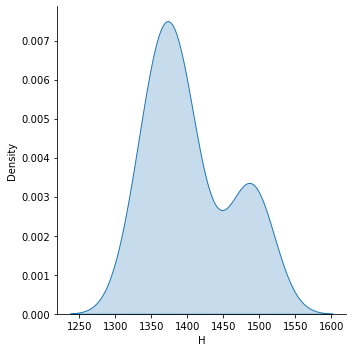

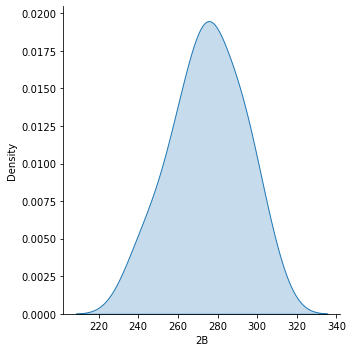

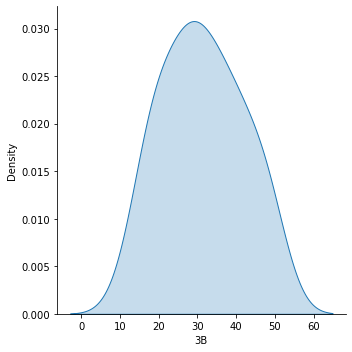

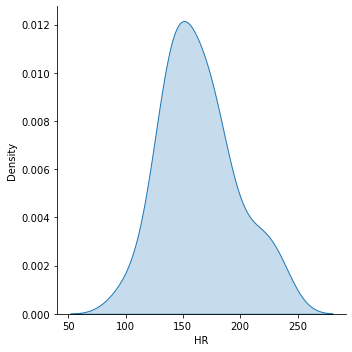

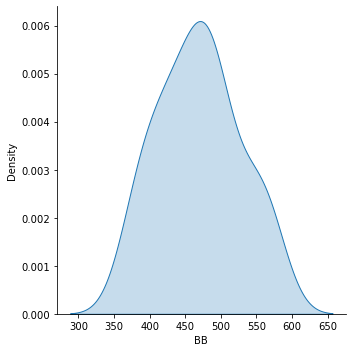

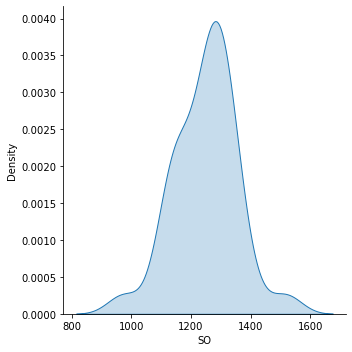

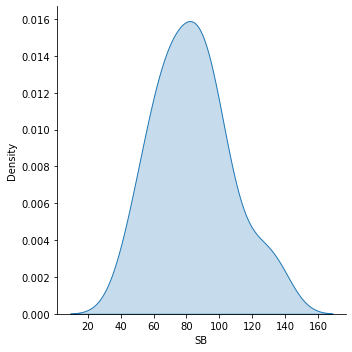

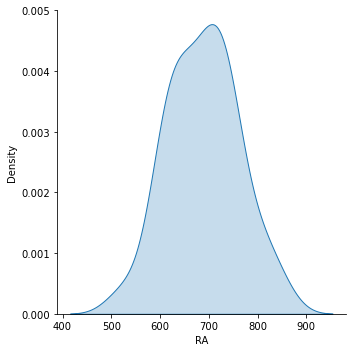

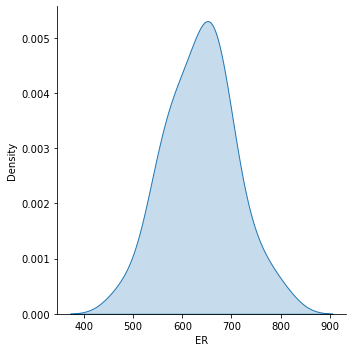

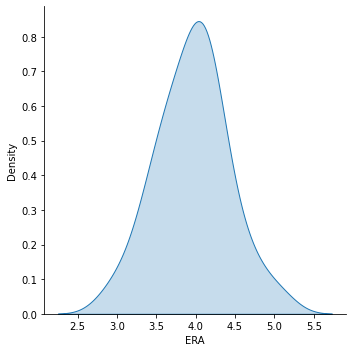

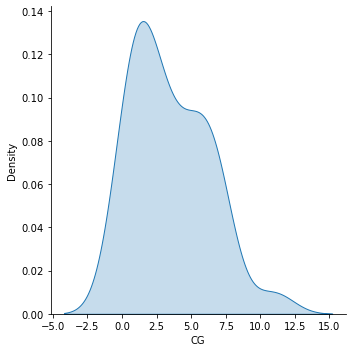

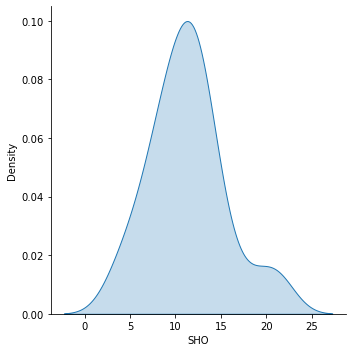

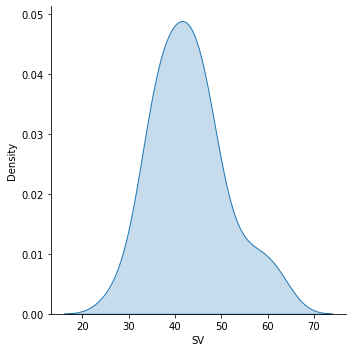

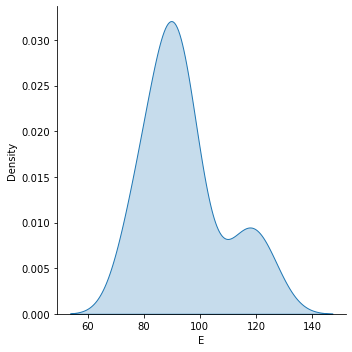

In [105]:
#plotting the normal distribution curve
for i in df.columns:
    sns.displot(df[i], kind="kde", fill=True)
    

From density plots of various columns we can say that ,highly skewed features of dataset are:
    R
    ,H
    ,HR
    ,SB
    ,CG
    ,SHO
    ,SV
    and E.

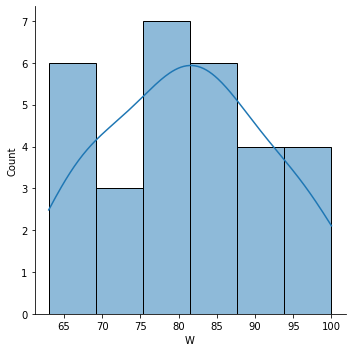

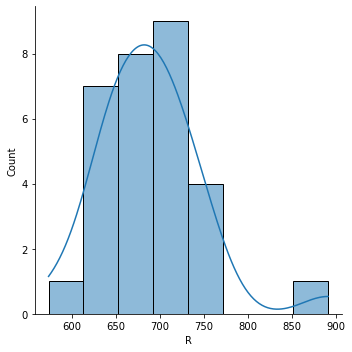

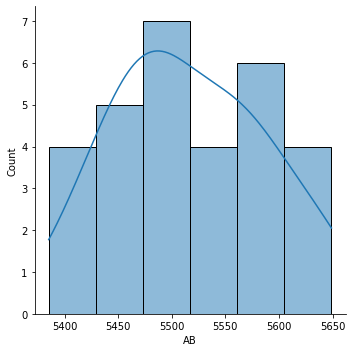

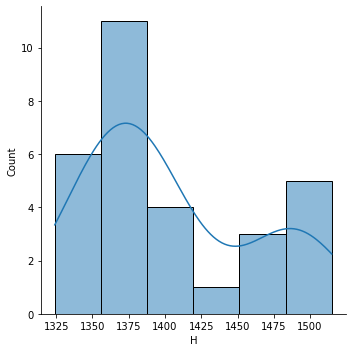

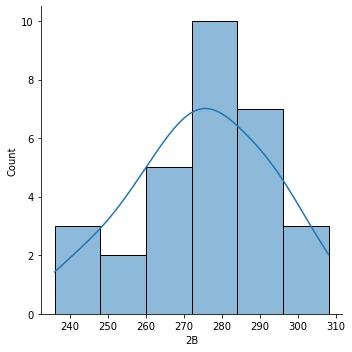

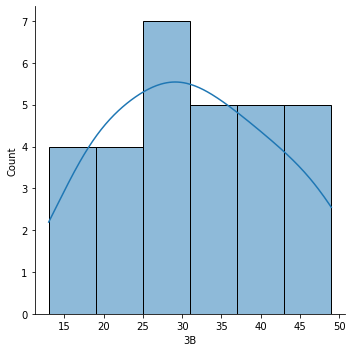

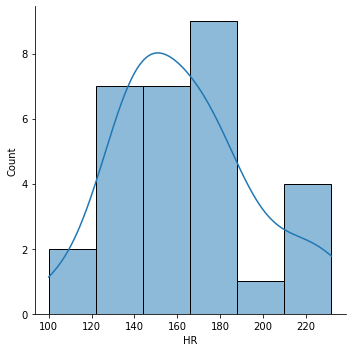

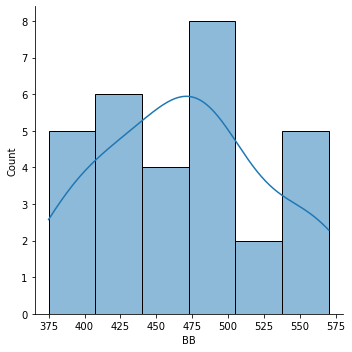

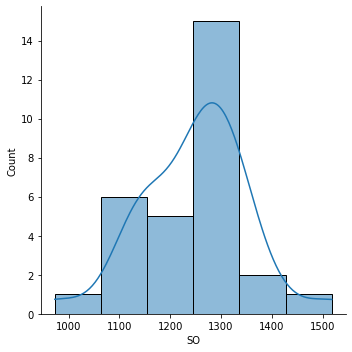

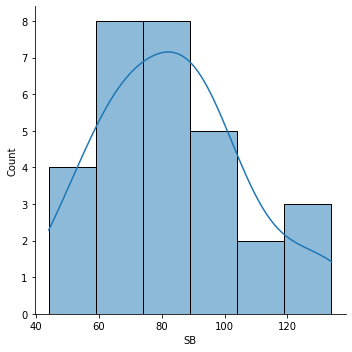

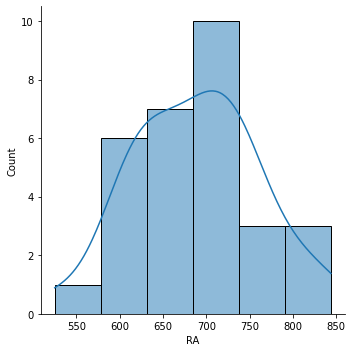

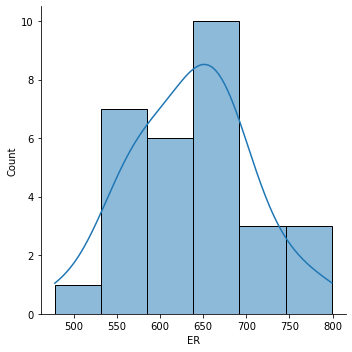

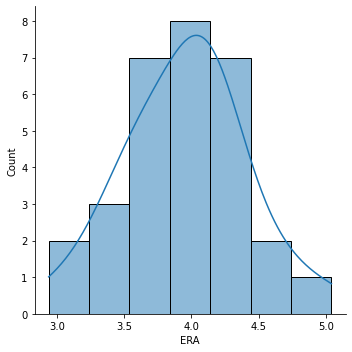

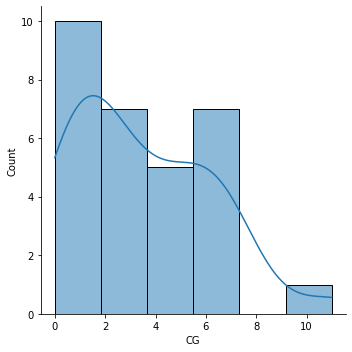

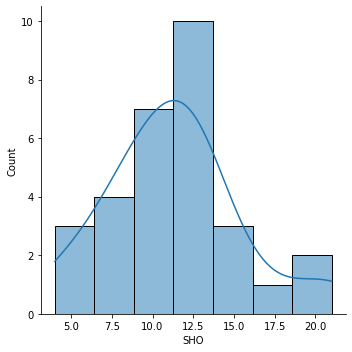

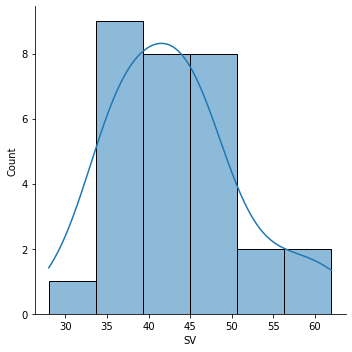

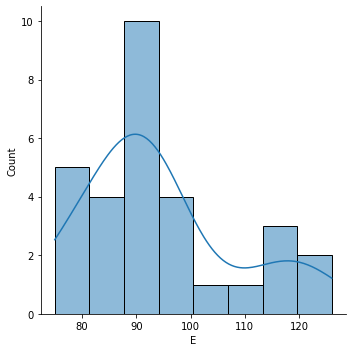

In [106]:
for i in df.columns:
    sns.displot(df[i],kde=True)

In [107]:
#checking for the numerical value of skewness for all columns of the dataset
for i in df.columns:
    print(i,df[i].skew())

W 0.047088688953686085
R 1.2007863569707353
AB 0.18343655908507983
H 0.6702537173217267
2B -0.23064991757259148
3B 0.129502450836424
HR 0.5164407366297173
BB 0.15849848440330838
SO -0.1560654813644833
SB 0.4798928679573835
RA 0.04573397531336112
ER 0.05870979570981254
ERA 0.053331339494040286
CG 0.7368452725826206
SHO 0.5657904298216165
SV 0.6575235461553925
E 0.8901318267689016


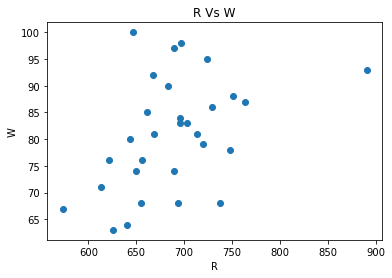

In [108]:
#plotting the scatter plot between R and W
x= df["R"]; y = df["W"]
plt.scatter(x,y)
plt.title("R Vs W")
plt.xlabel("R")
plt.ylabel("W")
plt.show()

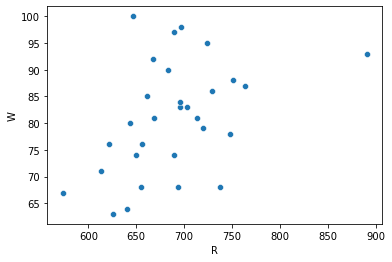

In [109]:
sns.scatterplot(data=df, x="R", y="W")

In [110]:
#CHECKING THE CORRELATIONS OF ALL COLUMNS WITH COLUMN B
corr_matrix=df.corr()
corr_matrix['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

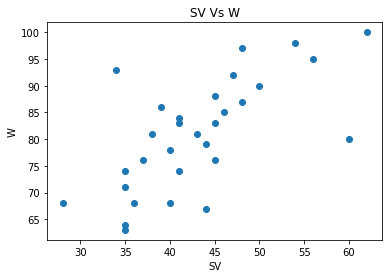

In [111]:
x= df["SV"]; y = df["W"]
plt.scatter(x,y)
plt.title("SV Vs W")
plt.xlabel("SV")
plt.ylabel("W")
plt.show()

We can see there is some good linear relationship present between SV and W Columns.

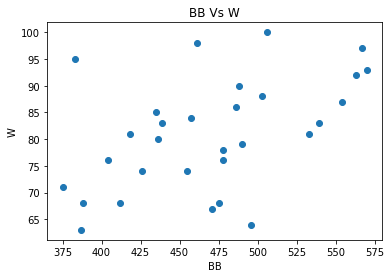

In [112]:
x= df["BB"]; y = df["W"]
plt.scatter(x,y)
plt.title("BB Vs W")
plt.xlabel("BB")
plt.ylabel("W")
plt.show()

In this scatter plot also we have very small positive linear relationship between BB and W columns.

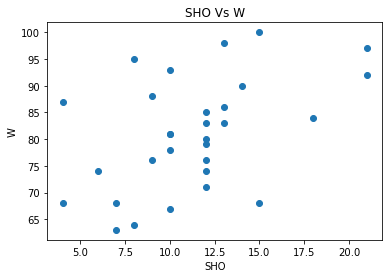

In [113]:
x= df["SHO"]; y = df["W"]
plt.scatter(x,y)
plt.title("SHO Vs W")
plt.xlabel("SHO")
plt.ylabel("W")
plt.show()

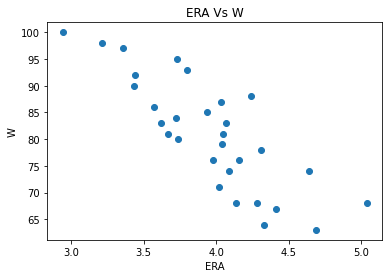

In [114]:
x= df["ERA"]; y = df["W"]
plt.scatter(x,y)
plt.title("ERA Vs W")
plt.xlabel("ERA")
plt.ylabel("W")
plt.show()

We can see from above scatterplot that the realtionship between ERA and W is strong and its a inversely proportional

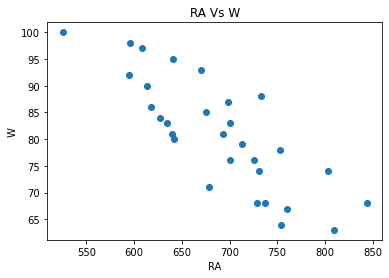

In [115]:
x= df["RA"]; y = df["W"]
plt.scatter(x,y)
plt.title("RA Vs W")
plt.xlabel("RA")
plt.ylabel("W")
plt.show()

We can see from above scatterplot that the realtionship between RA and W is strong and its a inversely proportional

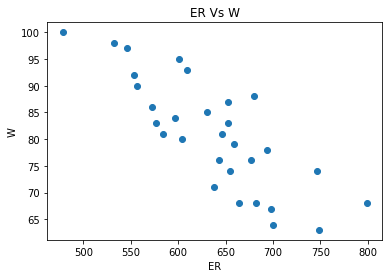

In [116]:
x= df["ER"]; y = df["W"]
plt.scatter(x,y)
plt.title("ER Vs W")
plt.xlabel("ER")
plt.ylabel("W")
plt.show()

Here also relationship is inversely portional between W and ER

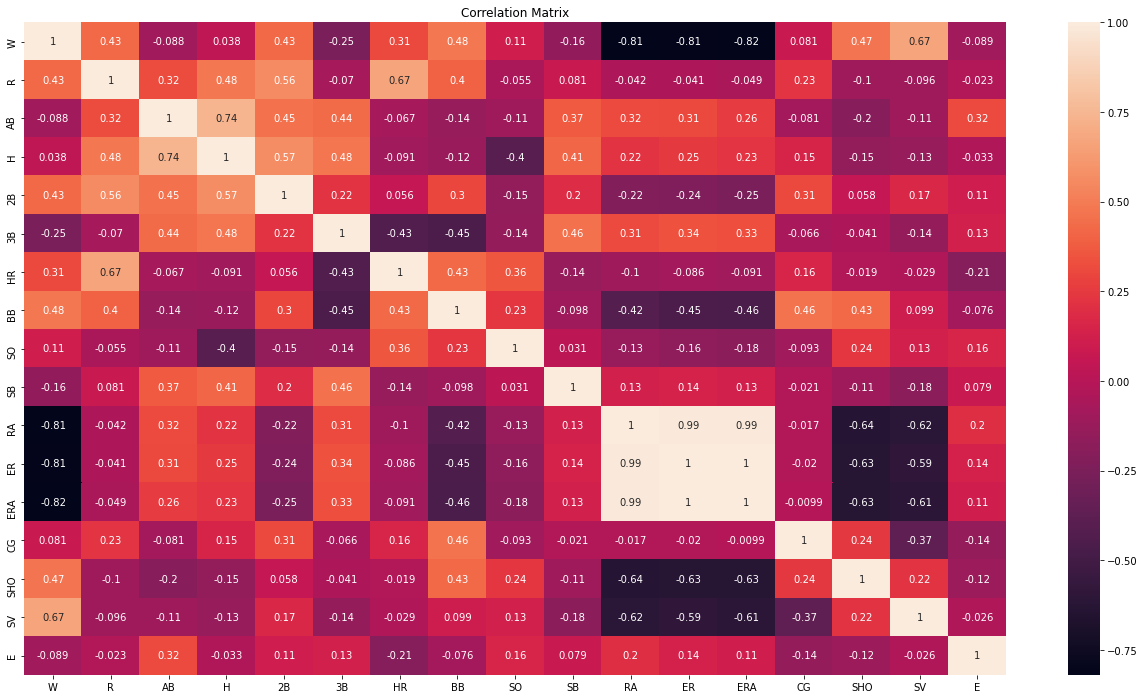

In [117]:
# Visualising correlation matrix
corr_mat=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

Positive strong relationship of W with :-SV AND BB --------
Negative strong realtionship of W with :-ERA,RA and ER

In [119]:
#SCALING THE DATA
from sklearn.preprocessing import StandardScaler
obj= StandardScaler()
df = obj.fit_transform(df) 

In [120]:
df

array([[ 1.36540860e+00,  6.19077968e-01,  8.47731264e-01,
         1.66368512e+00,  1.42017307e+00,  1.04119304e+00,
        -7.87298598e-01, -1.53490242e+00, -2.69762957e+00,
         9.13883291e-01, -6.66233927e-01, -5.05110079e-01,
        -5.06955186e-01, -5.39806195e-01, -8.14628593e-01,
         1.67160651e+00, -4.61469635e-01],
       [ 1.97838300e-01,  1.34431656e-01, -7.11093535e-01,
        -9.70680764e-01,  1.27403389e-01,  1.23580856e+00,
        -2.43966683e-01, -5.36591904e-01,  1.54878442e-01,
        -6.01825582e-01,  1.65970766e-01,  2.48929848e-01,
         2.54597523e-01, -5.39806195e-01,  1.72800005e-01,
         2.49879323e-01, -6.07196888e-01],
       [ 3.24325082e-03, -3.32905860e-01, -1.11523330e+00,
        -1.51891367e-01,  1.58879521e+00, -2.23807850e-01,
        -7.23377196e-01,  1.13914361e+00, -8.93981893e-01,
         1.11449182e-01, -6.80339091e-01, -7.51623132e-01,
        -6.41346840e-01,  2.77264091e+00, -3.20914294e-01,
        -6.54856158e-01, -1.1

In [121]:
#CONVERTING ARRAY INTO DATAFRAME
df=pd.DataFrame(df)

In [122]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.197838,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,0.003243,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-0.483244,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,-0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,1.170814,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,0.587028,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.003243,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.094054,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,-0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


In [123]:
#Renaming the column names
df = df.rename(columns = {0:"W",1:"R",2:"AB",3:"H",4:"2B",5:"3B",6:"HR",7:"BB",8:"SO",9:"SB",10:"RA",11:"ER",12:"ERA",13:"CG",14:"SHO",15:"SV",16:"E"}) 

In [124]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.197838,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,0.003243,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-0.483244,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,-0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,1.170814,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,0.587028,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.003243,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.094054,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,-0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


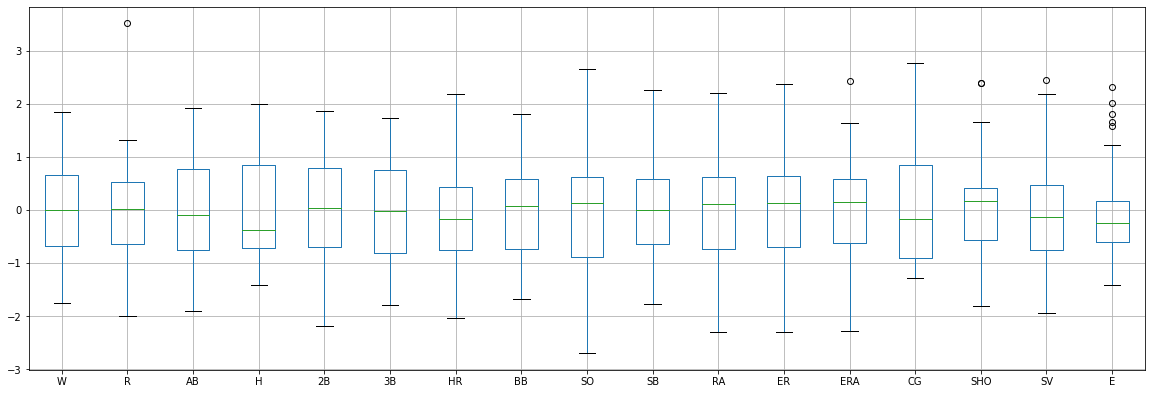

In [125]:
#PLOTTING BOXPLOTS FOR THE COLUMNS
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

From the boxplot  we can see that our dataset donot have much outliers.Hence we will not remove them from the dataset

In [126]:
#checking the skewness of the column
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [127]:
#we see the skewness in the dataset. we will remove the skewness using the power_transform function
from sklearn.preprocessing import power_transform
df_new=power_transform(df)

df_new=pd.DataFrame(df_new,columns=df.columns)


In [128]:
df_new.skew()

W      0.013631
R     -0.021440
AB     0.006064
H      0.083872
2B    -0.018357
3B     0.014252
HR    -0.038631
BB     0.026217
SO     0.103754
SB     0.037142
RA     0.005976
ER     0.032238
ERA    0.038398
CG     0.137257
SHO    0.009558
SV    -0.010548
E      0.007548
dtype: float64

In [129]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,-1.554312e-16,-2.627528e-16,3.497203e-15,5.329071e-16,-8.699060e-16,-5.921189e-17,2.368476e-16,-4.144833e-16,-4.440892e-16,-7.401487e-18,-2.220446e-16,-5.921189e-16,1.776357e-16,-8.049117e-17,-1.628327e-16,-3.996803e-16,3.659110e-16
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.748112e+00,-1.994550e+00,-1.894646e+00,-1.415675e+00,-2.177099e+00,-1.780732e+00,-2.033766e+00,-1.677518e+00,-2.697630e+00,-1.760897e+00,-2.302433e+00,-2.288705e+00,-2.276445e+00,-1.275906e+00,-1.802057e+00,-1.947335e+00,-1.408697e+00
25%,-6.778394e-01,-6.401370e-01,-7.543942e-01,-7.214840e-01,-7.016554e-01,-8.076544e-01,-7.473477e-01,-7.282319e-01,-8.890807e-01,-6.464053e-01,-7.332335e-01,-7.044956e-01,-6.133486e-01,-9.078559e-01,-5.677714e-01,-7.517921e-01,-6.071969e-01
50%,3.243251e-03,1.327008e-02,-9.045033e-02,-3.743885e-01,4.309232e-02,-2.919233e-02,-1.640649e-01,6.952520e-02,1.303724e-01,0.000000e+00,1.024975e-01,1.256733e-01,1.538038e-01,-1.717565e-01,1.728000e-01,-1.378645e-01,-2.428788e-01
75%,6.600015e-01,5.195524e-01,7.755634e-01,8.537956e-01,7.878401e-01,7.492698e-01,4.272080e-01,5.731372e-01,6.204940e-01,5.795357e-01,6.243886e-01,6.295750e-01,5.905767e-01,8.403801e-01,4.196572e-01,4.760632e-01,1.760871e-01
max,1.851896e+00,3.509647e+00,1.915815e+00,1.984081e+00,1.869832e+00,1.722347e+00,2.185047e+00,1.798742e+00,2.644696e+00,2.251273e+00,2.197114e+00,2.366042e+00,2.427263e+00,2.772641e+00,2.394514e+00,2.447094e+00,2.307348e+00


In [130]:
#splitting the independent and target variables in x and y
x=df.drop("W",axis=1)
y=df["W"]

In [131]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=114)

In [133]:
#finding best random_state
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range (1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is ",maxAccu,'on Random_state',maxRS)

Best r2_score is  0.9172122929401221 on Random_state 114


In [134]:
#DecisionTreeRegressor model
dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train)
ad_pred=dtr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


-0.23884758364312253
1.402139498679906


In [135]:
#knearest Neighbours regressor model
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
ad_pred=knr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))



0.47669144981412637
0.5922856030882833


In [136]:
#AdaBoost Regressor model
abr=AdaBoostRegressor()

abr.fit(x_train,y_train)
ad_pred=abr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.38943353727798435
0.6910449398740798


In [137]:
#Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
ad_pred=lr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.8793900813241542
0.13650745510651227


In [138]:
#Gradient boosting model
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
ad_pred=gbr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))



0.315579693425736
0.7746334240119368


In [139]:
#Support vector Regressor model
svr=SVR()

svr.fit(x_train,y_train)
ad_pred=svr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.3707136168115758
0.7122323242179306


In [140]:
#RandomForest Regressor model
rfr=RandomForestRegressor()

rfr.fit(x_train,y_train)
ad_pred=rfr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.41343819702602225
0.6638762372592539


In [141]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=7)
print("Cross validation score of LinearRegression model :",scr.mean())
scr=cross_val_score(gbr,x,y,cv=7)
print("Cross validation score of gradientBoostingRegression model :",scr.mean())
scr=cross_val_score(svr,x,y,cv=7)
print("Cross validation score of Support vector regression model :",scr.mean())
scr=cross_val_score(abr,x,y,cv=7)
print("Cross validation score of AdaBoostRegressor model :",scr.mean())
scr=cross_val_score(knr,x,y,cv=7)
print("Cross validation score of Knearest neighbour regressor model :",scr.mean())
scr=cross_val_score(dtr,x,y,cv=7)
print("Cross validation score of DecisionTreeRegressor model :",scr.mean())
scr=cross_val_score(rfr,x,y,cv=7)
print("Cross validation score of RandomForestRegressor model :",scr.mean())


Cross validation score of LinearRegression model : 0.3890804644289489
Cross validation score of gradientBoostingRegression model : -0.4815272135691746
Cross validation score of Support vector regression model : -0.037824065851272896
Cross validation score of AdaBoostRegressor model : -0.31416252405086126
Cross validation score of Knearest neighbour regressor model : 0.1571168013915257
Cross validation score of DecisionTreeRegressor model : -1.4147717099494048
Cross validation score of RandomForestRegressor model : -0.07168845396786541


HYPER PARAMETER TUNING

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
parameters={ "fit_intercept":np.array([1,2,3,4,5,6,7,8,9]), "normalize":np.array([10,11,12,13,14]), "copy_X":np.array([12,13,14,15,16]), "n_jobs":np.array([14,15,16,17,18,19])}

In [144]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [145]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': array([12, 13, 14, 15, 16]),
                         'fit_intercept': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_jobs': array([14, 15, 16, 17, 18, 19]),
                         'normalize': array([10, 11, 12, 13, 14])})

In [146]:
GCV.best_params_  #printing the best parameters found by the GridSearchCV

{'copy_X': 12, 'fit_intercept': 1, 'n_jobs': 14, 'normalize': 10}

In [147]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [148]:
r2_score(y_test,GCV_pred)

0.8793900813241543

In [149]:
#Dumping our model
import joblib   
joblib.dump(GCV.best_estimator_,"baseballlr.pkl")

['baseballlr.pkl']